In [22]:
path = "D:/"
with h5py.File(path+'finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


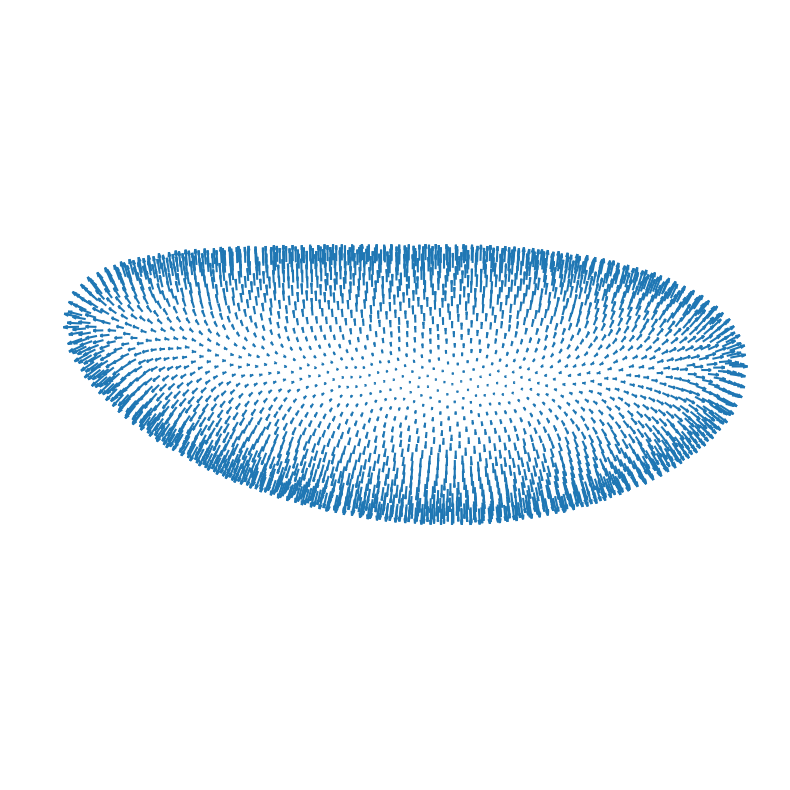

In [52]:
# make 3d quiver plot of the p vectors at positions positions[0]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

yy = positions[0][:,1] > 0
# only plot every 10th arrow
# yy[::2] = False
ax.view_init(elev=0, azim=-90)
# 3d arrows
ax.quiver(positions[0][:,0][yy], positions[0][:,1][yy], positions[0][:,2][yy], p[0][:,0][yy], p[0][:,1][yy], p[0][:,2][yy], length=3, normalize=True,  )
# equal axis
ax.set_aspect('equal')

# move camera

# remove axis
ax.set_axis_off()
plt.show()


In [23]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

import sys
# add parent directory to path
sys.path.append('../')
from aggregate_statistics import get_rosettes, make_rosette_images

# path = '../../CodePass2/runs/'
# path = "D:/"
# with h5py.File(path+'finale_normal.hdf5', 'r') as f:
#     # read the data
#     positions = f['x'][:]
#     properties = f['properties'][:][0]
#     p = f['p'][:]

positions = np.load("../f_poss.npy")
properties = np.load("../f_properties.npy")
p = np.load("../f_p.npy")

0
1
2
3
4


(-75.99343795776367,
 58.385771942138675,
 -25.59976930618286,
 25.656194400787353)

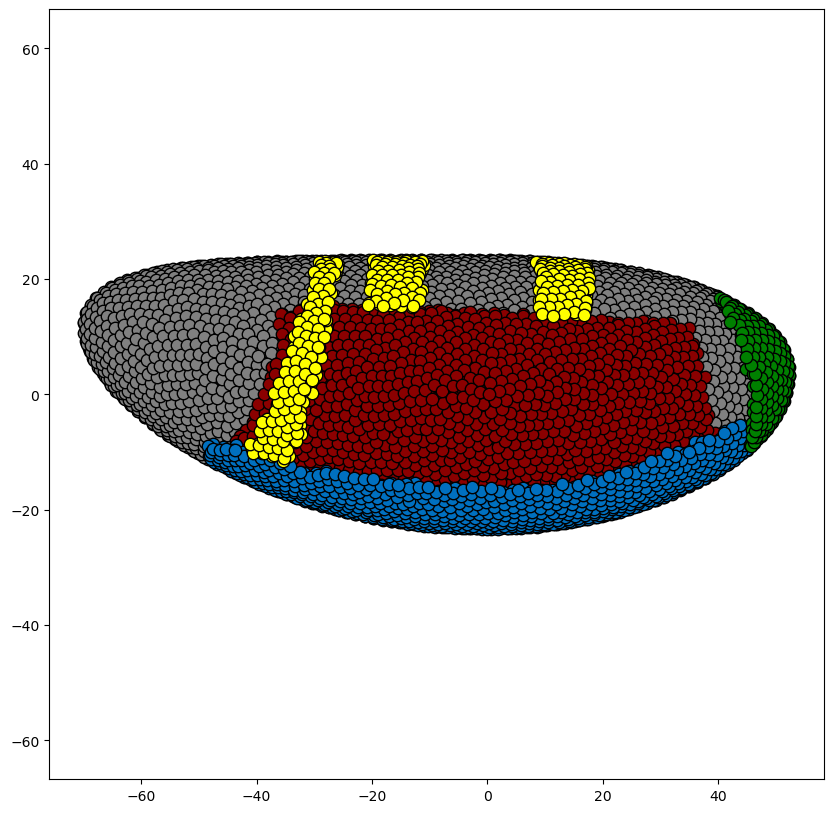

In [21]:
plt.figure(figsize=(10,10))
x = positions[1]
sort = np.argsort(x[:,1],)
props = properties[sort]
xx = x[sort]

cs = ["grey", "darkred", "#0070C0", "green", "yellow", ][::1]

ci = 0
for p in np.unique(props)[::1]:
    print(ci)
    ccc = cs[ci]
    plt.scatter(xx[:,0][props == p], xx[:,2][props == p], c=ccc,edgecolor = "k", s = 80)
    ci +=1
plt.axis('equal')

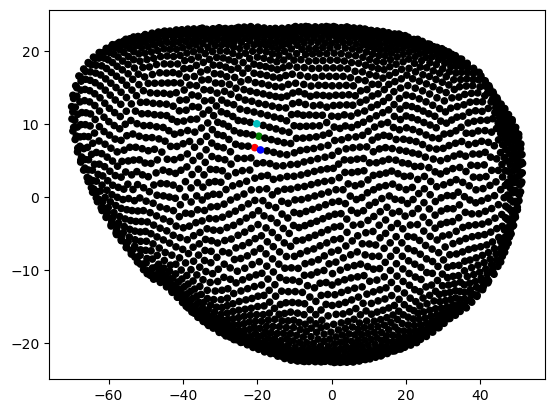

In [2]:
allids = properties
cc = []
for i in range(len(properties)):
    if i == 786:
        cc.append('r')
    elif i == 2346:
        cc.append('g')
    elif i == 2243:
        cc.append('b')
    elif i == 4388:
        cc.append('c')
    else:
        cc.append('k')
xx,yy,zz = positions[10,:,0], positions[10,:,1], positions[10,:,2]

plt.scatter(xx[yy<0], zz[yy<0], c=np.array(cc)[yy<0], s=20)

In [12]:
# get the rosettes
rosettes = get_rosettes(positions, properties, [1], 30, max_dist = 3.)
counts, vecs_between = rosettes
vecs_between = np.array(vecs_between)

# # save the rosettes
# np.save('rosettes.npy', rosettes)
# # save the vecs_between
# np.save('vecs_between.npy', vecs_between)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:44<00:00,  2.22it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (99,) + inhomogeneous part.

In [7]:
# save the rosettes
np.save('rosettes.npy', rosettes)
# save the vecs_between
np.save('vecs_between.npy', np.array(vecs_between))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [53]:
counts.sum()

525.0

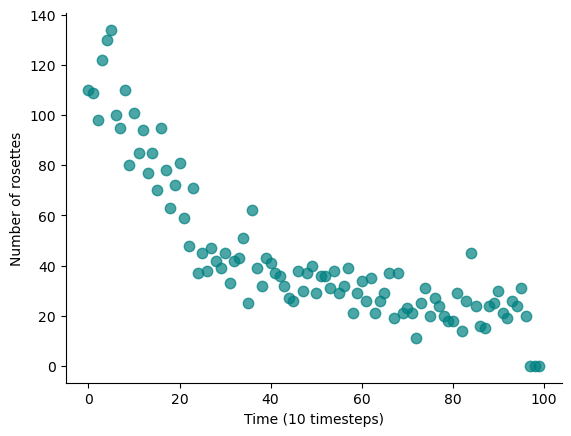

In [13]:

y = counts.sum(axis=1)
# smooth the data
# y = np.convolve(y, np.ones(10)/10, mode='valid')
plt.plot(y,'.', ms=15, alpha = 0.7, c= 'teal')
plt.ylabel('Number of rosettes')
plt.xlabel('Time (10 timesteps)')
import seaborn as sns
sns.despine()
plt.show()

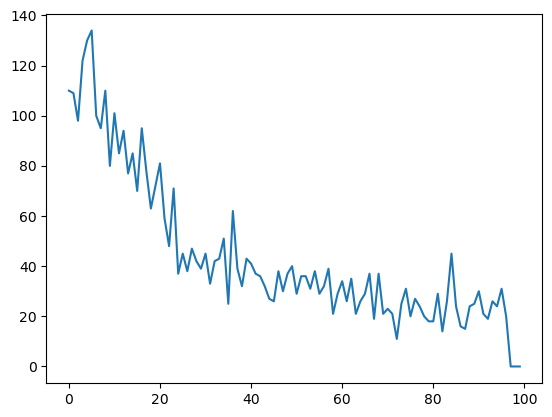

In [20]:
plt.plot(y)

In [15]:
vecs_between = [np.array(v) for v in vecs_between]


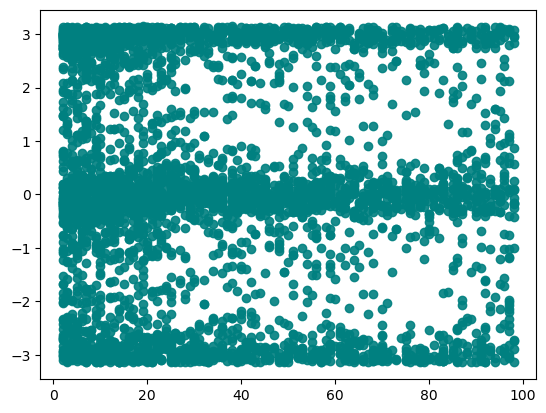

In [16]:

def get_angle(vecs):
    if len(vecs) == 0:
        return []
    xx, yy, zz = vecs.T 
    
    return np.arctan2(zz, xx)

angles = [get_angle(v) for v in vecs_between]
    
# usable = np.abs(zz) > np.abs(yy)
# angles = np.arctan2(zz[usable], xx[usable])
for i in range(len(angles)):
    if len(angles[i]) == 0:
        angles[i] = np.nan
    else:
        plt.plot([i]*len(angles[i]), angles[i], 'o', alpha = 0.9, c='teal')


array([[-2.3928232 , -0.67547035,  1.485116  ],
       [-0.22532105, -1.6113129 ,  4.6392655 ],
       [-3.057373  ,  0.58823586, -0.3778286 ],
       ...,
       [ 1.9955959 ,  0.7823963 , -1.027998  ],
       [-0.44737625, -2.3418026 , -2.7458282 ],
       [-1.9714508 ,  0.8592863 , -0.6498306 ]], dtype=float32)

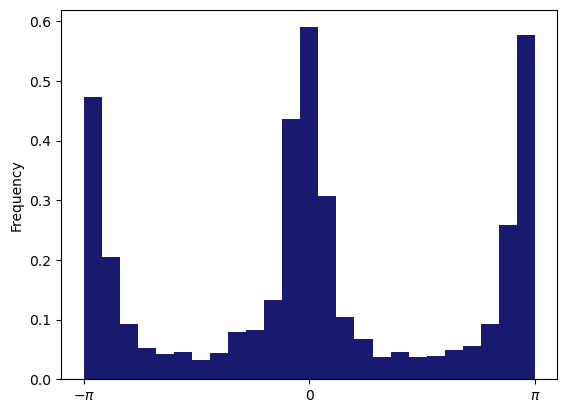

In [19]:
# morey = np.abs(vecs_between_flattened[:,1]) > np.abs(vecs_between_flattened[:,2]) 

plt.hist(np.array(angles_flattened), bins=25, facecolor = "midnightblue", density = 1)#, edgecolor = "#901A1E")
plt.xticks([-np.pi, 0, np.pi,], ["$-\pi$", "0", "$\pi$"])
plt.ylabel("Frequency")
plt.show()

In [18]:
angles_flattened = []

for a in angles:
    if isinstance(a, float):
        if a != a:
            continue
        a = [a]


    angles_flattened += list(a)